In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

import os

# DATA PREPROCESSING

In [3]:
# import dataset
liver = pd.read_csv("C:\sai\indian_liver_patient.csv")
liver.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [4]:
liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
liver.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [6]:
liver.shape

(583, 11)

# EXPLORATORY DATA ANALYSIS

In [7]:
liver.dtypes [liver.dtypes=='object']


Gender    object
dtype: object

# DATA CLEANING

In [8]:
liver.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
578    False
579    False
580    False
581    False
582    False
Length: 583, dtype: bool

In [9]:
liver=liver.drop_duplicates()
print(liver.shape)

(570, 11)


# checking missing value

In [10]:
#Count Not a Number Values in Pandas DataFrame
liver.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

<Axes: xlabel='Albumin_and_Globulin_Ratio'>

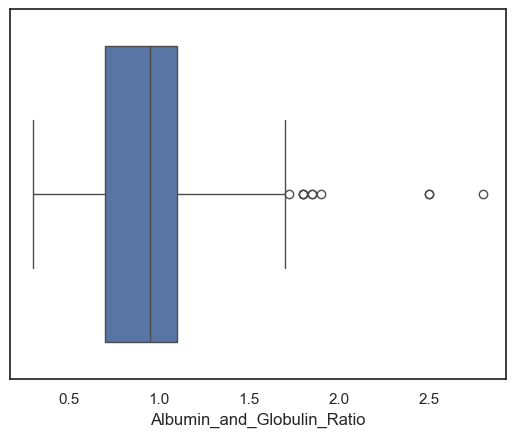

In [11]:
sns.boxplot(data=liver,x='Albumin_and_Globulin_Ratio')

In [12]:
liver['Albumin_and_Globulin_Ratio'].mode()

0    1.0
Name: Albumin_and_Globulin_Ratio, dtype: float64

In [13]:
liver['Albumin_and_Globulin_Ratio'].median()

0.95

In [14]:
liver['Albumin_and_Globulin_Ratio'].mean()

0.9480035335689044

In [15]:
liver['Albumin_and_Globulin_Ratio']=liver['Albumin_and_Globulin_Ratio'].fillna(liver['Albumin_and_Globulin_Ratio'].median())

In [16]:
liver.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [17]:
liver

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [18]:
liver['Dataset']

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Dataset, Length: 570, dtype: int64

# DISTRIBUTION OF NUMERICAL FEATURES

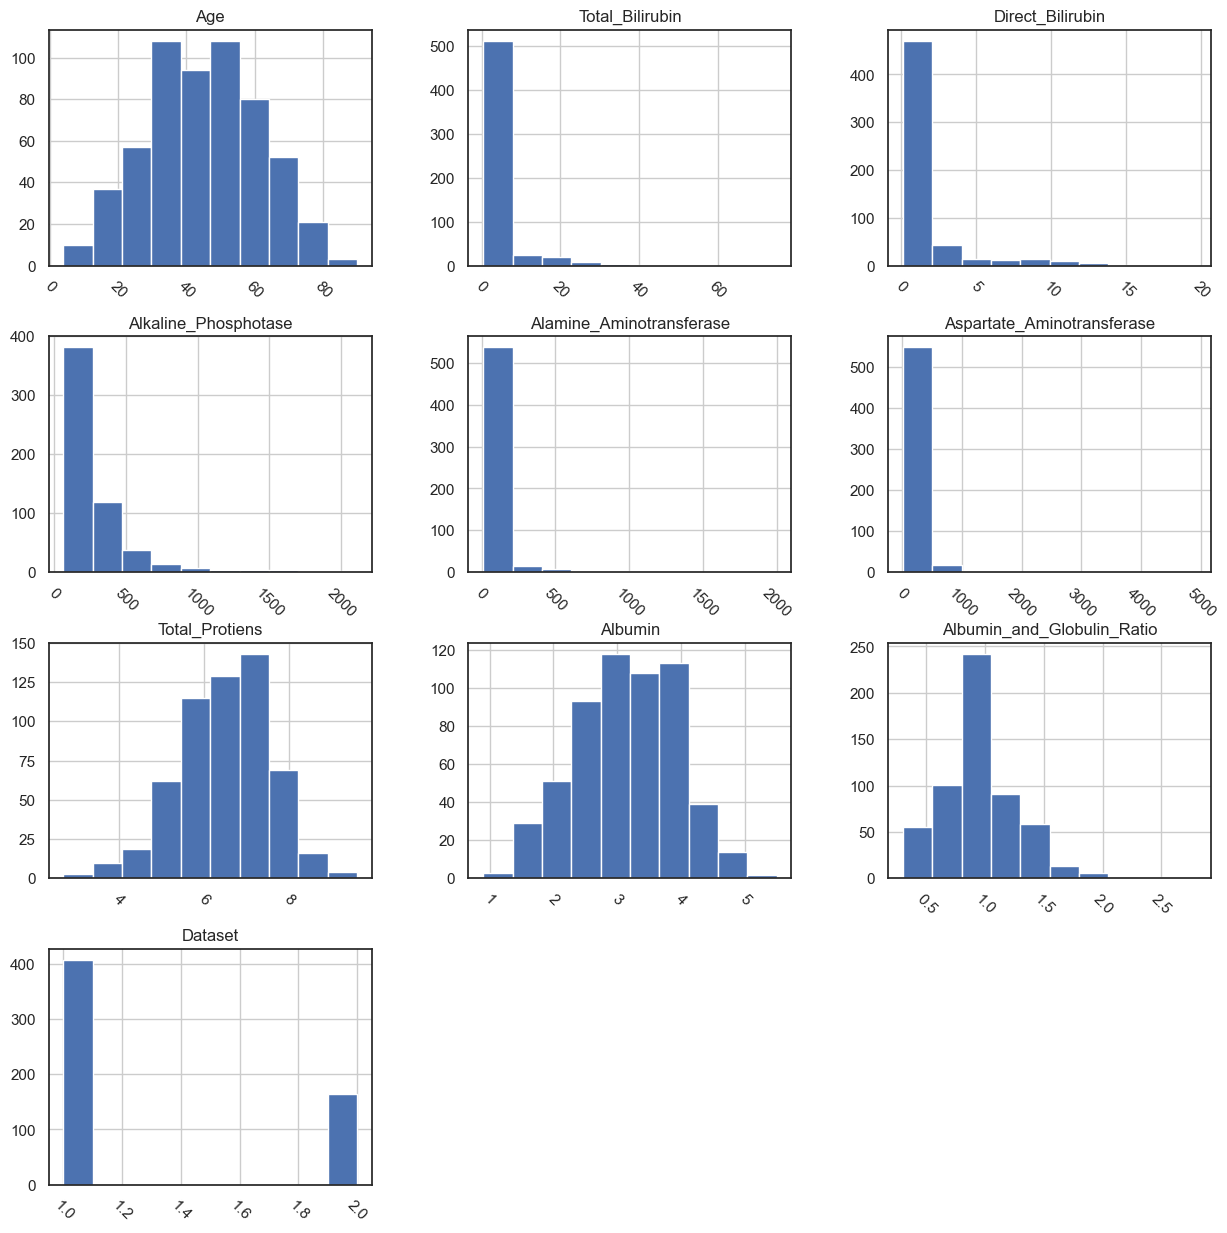

In [19]:
# Plot histogram grid
liver.hist(figsize=(15,15), xrot=-45, bins=10) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

# BAR PLOTS FOR CATEGORICAL FEATURES

<Axes: xlabel='Total_Bilirubin', ylabel='Direct_Bilirubin'>

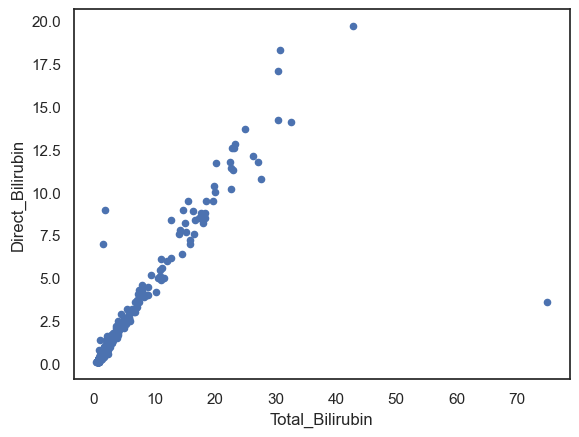

In [20]:
liver.plot(kind="scatter", x="Total_Bilirubin", y="Direct_Bilirubin")

<Axes: xlabel='Gender', ylabel='count'>

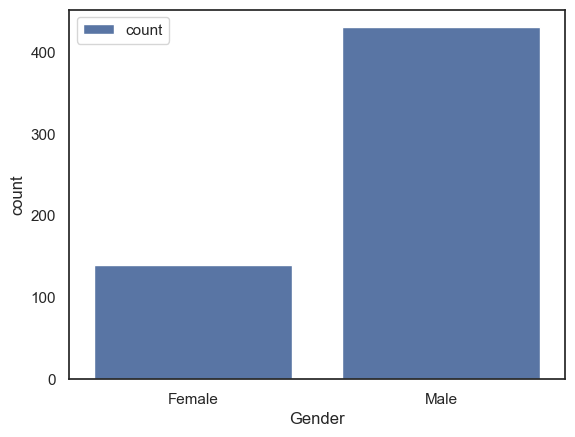

In [21]:
import seaborn as sns
sns.countplot(data = liver,x='Gender',label='count') #counts of observations in each categorical bin using bars

In [22]:
Male,Female=liver['Gender'].value_counts()
print('Number of patients that are male:',Male)
print('Number of patients that are female:',Female)

Number of patients that are male: 430
Number of patients that are female: 140


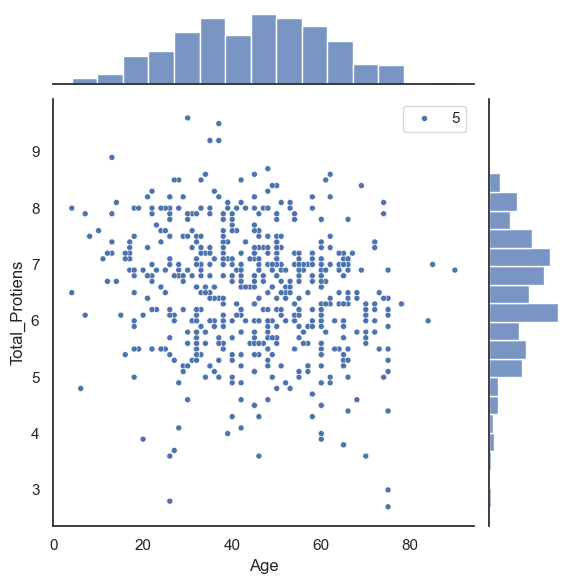

In [23]:
sns.jointplot(x="Age", y="Total_Protiens", data=liver, size=5)

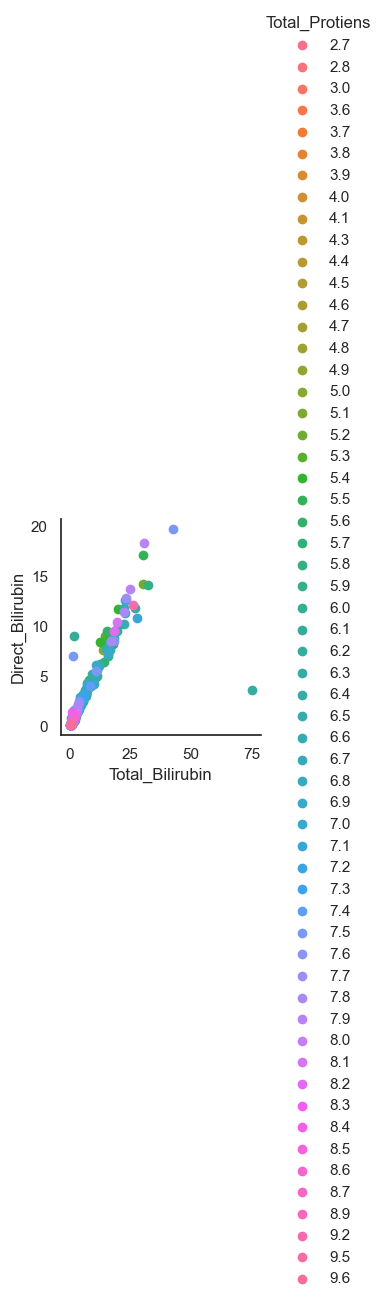

In [24]:
sns.FacetGrid(liver, hue="Total_Protiens")\
   .map(plt.scatter, "Total_Bilirubin", "Direct_Bilirubin")\
   .add_legend()

In [25]:
sns.pairplot(liver.drop("Age", axis=1), hue="Total_Protiens", size=3)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le =  LabelEncoder()

In [ ]:
liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
liver['Gender'].replace(to_replace=['Male','Female'], value=[0,1],inplace=True)


In [ ]:
liver

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [ ]:
liver.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [ ]:
Feature = liver[['Age','Gender','Total_Bilirubin','Direct_Bilirubin',
                      'Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase',
                      'Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']]

# MACHINE LEARNING MODELS

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
X = liver.iloc[:, :-1].values
Y = liver.iloc[:, -1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print(X.shape, Y.shape, X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(570, 10) (570,) (456, 10) (114, 10) (456,) (114,)


# LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(Y_pred,Y_test))

              precision    recall  f1-score   support

           1       0.78      0.93      0.85        85
           2       0.54      0.24      0.33        29

    accuracy                           0.75       114
   macro avg       0.66      0.59      0.59       114
weighted avg       0.72      0.75      0.72       114

[[79  6]
 [22  7]]
accuracy is 0.7543859649122807


# K Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(Y_pred,Y_test))

              precision    recall  f1-score   support

           1       0.76      0.92      0.83        85
           2       0.36      0.14      0.20        29

    accuracy                           0.72       114
   macro avg       0.56      0.53      0.51       114
weighted avg       0.66      0.72      0.67       114

[[78  7]
 [25  4]]
accuracy is 0.7192982456140351


# Support Vector Machine

In [ ]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(Y_pred,Y_test))

              precision    recall  f1-score   support

           1       0.75      1.00      0.85        85
           2       0.00      0.00      0.00        29

    accuracy                           0.75       114
   macro avg       0.37      0.50      0.43       114
weighted avg       0.56      0.75      0.64       114

[[85  0]
 [29  0]]
accuracy is 0.7456140350877193


# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(Y_pred,Y_test))

              precision    recall  f1-score   support

           1       0.75      1.00      0.85        85
           2       0.00      0.00      0.00        29

    accuracy                           0.75       114
   macro avg       0.37      0.50      0.43       114
weighted avg       0.56      0.75      0.64       114

[[85  0]
 [29  0]]
accuracy is 0.7456140350877193
